In [ ]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
Data = pd.read_csv(r'./test.csv')
Data = Data.astype(str)
rows, columns = Data.shape

In [ ]:
Data

,text,summary
0,Generative Adversarial Networks (GANs) are n...,On the Role of Receptive Field in Unsupervised...
1,"Humanitarian crises, such as the 2014 West A...",On the interplay of data and cognitive bias in...
2,One of the most widely used chiroptical spec...,Enhanced molecular chiral signals via molecula...
3,For a graph consisting of parallel connected...,Characteristic functions under series and para...
4,Results of the application of pattern recogn...,A Selection of Giant Radio Sources from NVSS
...,...,...
1995,An optimised subsea system design for energy...,Design Optimisation of Power-Efficient Submari...
1996,We apply a diagrammatic expansion method aro...,Anisotropy of the Energy Gap in the Insulating...
1997,In this paper we partially resolve Hall's co...,Hall's Conjecture on Extremal Sets for Random ...
1998,This paper is concerned with the deployment ...,Distributed Adaptive Coverage Control of Diffe...


In [ ]:
df=Data[Data['text'].isnull()==False]
df=Data[Data['summary'].isnull()==False]
df=df[df['text']!='nan']

df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates

In [ ]:

df

,text,summary
0,Generative Adversarial Networks (GANs) are n...,On the Role of Receptive Field in Unsupervised...
1,"Humanitarian crises, such as the 2014 West A...",On the interplay of data and cognitive bias in...
2,One of the most widely used chiroptical spec...,Enhanced molecular chiral signals via molecula...
3,For a graph consisting of parallel connected...,Characteristic functions under series and para...
4,Results of the application of pattern recogn...,A Selection of Giant Radio Sources from NVSS
...,...,...
1995,An optimised subsea system design for energy...,Design Optimisation of Power-Efficient Submari...
1996,We apply a diagrammatic expansion method aro...,Anisotropy of the Energy Gap in the Insulating...
1997,In this paper we partially resolve Hall's co...,Hall's Conjecture on Extremal Sets for Random ...
1998,This paper is concerned with the deployment ...,Distributed Adaptive Coverage Control of Diffe...


In [ ]:
stop_words = set(stopwords.words('english'))

def text_cleaner(text,num):
  str = text.lower()
  str = BeautifulSoup(str, "lxml").text
  str = re.sub(r'[)]*', '', str)
  str = re.sub('"','', str)
  str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])
  str = re.sub(r"'s\b","",str)
  str = re.sub("[^a-zA-Z]", " ", str)
  str = re.sub('[m]{2,}', 'mm', str)
  if(num==0):
    str = re.sub(r'\.',' . ',str)
  if(num==0):
      tokens = [w for w in str.split() if not w in stop_words]

  else:
      tokens=str.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:                                                 #removing short words
          long_words.append(i)
  return (" ".join(long_words)).strip()

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [ ]:
#call the function
clean_text = []
for t in df['text']:
    clean_text.append(text_cleaner(t,0))

In [ ]:
#call the function
clean_summary = []
for t in df['summary']:
    clean_summary.append(text_cleaner(t,0))

In [ ]:
df['text']=clean_text
df['summary']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

In [ ]:
df


,text,summary
0,generative adversarial networks gans widely us...,role receptive field unsupervised sim real ima...
1,humanitarian crises west africa ebola epidemic...,interplay data cognitive bias crisis informati...
2,one widely used chiroptical spectroscopic meth...,enhanced molecular chiral signals via molecula...
3,graph consisting parallel connected subgraphs ...,characteristic functions series parallel conne...
4,results application pattern recognition techni...,selection giant radio sources nvss
...,...,...
1995,optimised subsea system design energy efficien...,design optimisation power efficient submarine ...
1996,apply diagrammatic expansion method around ato...,anisotropy energy gap insulating phase hubbard...
1997,paper partially resolve hall conjecture distri...,hall conjecture extremal sets random triangles
1998,paper concerned deployment multiple mobile rob...,distributed adaptive coverage control differen...


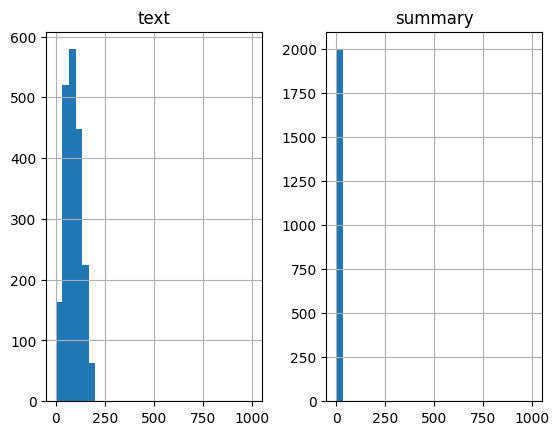

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['text']:
      temp=i.split()
      text_word_count.append(len(temp))

for j in df['summary']:
  #print(j)
  temp1=j.split()
  headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'text':text_word_count, 'summary':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [ ]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 50

max_len_text= 150
max_len_headline=50

In [ ]:
cnt=0
for i in df['text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(df['text']))

0.6395


In [ ]:
df

,text,summary
0,generative adversarial networks gans widely us...,role receptive field unsupervised sim real ima...
1,humanitarian crises west africa ebola epidemic...,interplay data cognitive bias crisis informati...
2,one widely used chiroptical spectroscopic meth...,enhanced molecular chiral signals via molecula...
3,graph consisting parallel connected subgraphs ...,characteristic functions series parallel conne...
4,results application pattern recognition techni...,selection giant radio sources nvss
...,...,...
1995,optimised subsea system design energy efficien...,design optimisation power efficient submarine ...
1996,apply diagrammatic expansion method around ato...,anisotropy energy gap insulating phase hubbard...
1997,paper partially resolve hall conjecture distri...,hall conjecture extremal sets random triangles
1998,paper concerned deployment multiple mobile rob...,distributed adaptive coverage control differen...


In [ ]:

text1 =np.array(df['text'])
headline1=np.array(df['summary'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=150):
        short_text.append(text1[i])
        short_summary.append(headline1[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)


In [ ]:
print(df['text'][50],df['summary'][50],sep='\n')

precision optical spectroscopy exotic ions reveals accurate information nuclear properties charge radii magnetic quadrupole moments thorium ions exhibit unique nuclear properties high relevance testing symmetries nature report loading trapping single th ions linear paul trap embedded sympathetically cooled small crystals trapped ca ions trapped th ions identified non destructive manner voids laser induced ca fluorescence pattern emitted crystal alternatively means time flight signal extracting ions paul trap steering external detector loaded handled total individual th ions reach time flight detection efficiency gtrsim consistent quantum efficiency detector sympathetic cooling technique expected applicable isotopes various charge states th future studies th
trapping sympathetic cooling single thorium ions spectroscopy


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
print(len(x_train))
print(len(x_test))

1292
554


In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:

SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")

    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [ ]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
print(random.choice(pairs))

Reading lines...
Read 1292 sentence pairs
Counting words...
Counted words:
['gravity fundamentally quantum two quantum particles must get entangled due mutual interaction gravity phenomenon dubbed gravity mediated entanglement led recent efforts detecting perturbative quantum gravity table top experimental setups paper generalize imagine two idealized massive oscillators ground state get entangled due gravity expanding universe find curvature background spacetime leaves imprints resulting entanglement profile thus detecting gravity mediated entanglement cosmological observations open exciting new avenue measuring local expansion rate cosmos'
 'event driven genetic programming representations shown outperform traditional imperative representations interaction intensive problems event driven approach organizes genome content modules triggered response environmental signals simplifying simulation design implementation existing work developing event driven genetic programming methodology l

In [ ]:
pairs[1]

['event driven genetic programming representations shown outperform traditional imperative representations interaction intensive problems event driven approach organizes genome content modules triggered response environmental signals simplifying simulation design implementation existing work developing event driven genetic programming methodology largely used signalgp library caters traditional program synthesis applications signalgp lite library enables larger scale artificial life experiments streamlined agents reducing control flow overhead trading run time flexibility better performance due compile time configuration report benchmarking experiments show speedup also report solution quality equivalent signalgp two benchmark problems originally developed test ability evolved programs respond large number signals modulate signal response based context',
 'signalgp lite event driven genetic programming library large scale artificial life applications']

In [ ]:
SOS_token = 0
EOS_token = 1

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.LSTM(output, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size, device=device),torch.zeros(1, 1, self.hidden_size, device=device))


In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
MAX_LENGTH = 150

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size*2 , self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size*2 , self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.LSTM = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

        #print('Decoder --- atndecoder')

    def forward(self, input, hidden, encoder_outputs):
        #print("inside forward decoder")
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        #print("embedded size", embedded.size())
        #print(embedded[0].size()) #1,300
        #print(hidden[0].size()) # 1, 1, 300
        #print("diff or not")

        #temp = torch.cat((embedded[0], hidden[0]), 1)

        #print(temp)
        #print(temp.size())

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        #print("after getting attn weights softmax")
        #print(attn_weights.size())
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
#teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0
    #print('bbbbbbb-->>> input length', input_length)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        #print("priting before error")
        #print(encoder_output.size())
        #print(encoder_outputs.size())
        temp = encoder_output[0, 0]
        #print(temp)
        encoder_outputs[ei] = temp

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    #use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    #Without teacher forcing: use its own predictions as the next input

    #print('aaaaa-->>>')

    for di in range(target_length):
      decoder_output, decoder_hidden, decoder_attention = decoder(
      decoder_input, decoder_hidden, encoder_outputs)


      topv, topi = decoder_output.topk(1)

      decoder_input = topi.squeeze().detach()  # detach from history as input

      loss += criterion(decoder_output, target_tensor[di])

      if decoder_input.item() == EOS_token:
             break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)


In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue

        loss = train(input_tensor, target_tensor, encoder,decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        #print('cccccc->>>>')

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]


In [ ]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()
    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")

          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

In [ ]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 15000, print_every=1000)

Training....
1000 / 15001
14m 24s (- 201m 36s) (1000 6%) 3.2763
2000 / 15001
28m 46s (- 187m 4s) (2000 13%) 3.6915
3000 / 15001
42m 44s (- 170m 57s) (3000 20%) 3.7326
4000 / 15001
57m 20s (- 157m 40s) (4000 26%) 3.5457
5000 / 15001
71m 53s (- 143m 46s) (5000 33%) 3.7962
6000 / 15001
86m 20s (- 129m 30s) (6000 40%) 3.6947
7000 / 15001
100m 25s (- 114m 45s) (7000 46%) 3.7926
8000 / 15001
114m 4s (- 99m 48s) (8000 53%) 3.6234
9000 / 15001
128m 11s (- 85m 27s) (9000 60%) 3.5769
10000 / 15001
142m 33s (- 71m 16s) (10000 66%) 3.6684
11000 / 15001
156m 47s (- 57m 1s) (11000 73%) 3.6383
12000 / 15001
170m 52s (- 42m 43s) (12000 80%) 3.6927
13000 / 15001
185m 6s (- 28m 28s) (13000 86%) 3.6005
14000 / 15001
199m 40s (- 14m 15s) (14000 93%) 3.4509
15000 / 15001
213m 53s (- 0m 0s) (15000 100%) 3.2612


In [ ]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()
    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")

          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          # print('<', output_sentence)
          # print('')
    return(text,headline,pred_headline)

In [ ]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1,15000)

pred_df_LSTM=pd.DataFrame()

pred_df_LSTM['text']=text
pred_df_LSTM['headline']=headline
pred_df_LSTM['pred_headline']=pred_headline

0.0 % complete
6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
26.666666666666668 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
60.0 % complete
66.66666666666667 % complete
73.33333333333333 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [ ]:
for i in range(10,110):
  print("original Summary>>>",pred_df_LSTM.iloc[i]['headline'])
  print("Predicted Summary>>>",pred_df_LSTM.iloc[i]['pred_headline'])
  print('-----------------------------------------------------------------------')


original Summary>>> cooperation subset team games altruism selfishness
Predicted Summary>>> cooperation subset team team games systems 
-----------------------------------------------------------------------
original Summary>>> uniqueness renormalized solutions maxwell stefan system
Predicted Summary>>> uniqueness solutions theory 
-----------------------------------------------------------------------
original Summary>>> dark energy survey year results effect intracluster light photometric redshifts weak gravitational lensing
Predicted Summary>>> dark energy using using 
-----------------------------------------------------------------------
original Summary>>> orthogonal polynomials associated deltoid curve
Predicted Summary>>> orthogonal polynomials polynomials polynomials polynomials 
-----------------------------------------------------------------------
original Summary>>> quantum thermodynamics local control
Predicted Summary>>> control thermodynamics control control 
----------

In [ ]:

pred_df_LSTM.to_csv('Attention_LSTM_Pred.csv',sep='\t',index=False,header=True)

In [ ]:
def calculate_rogue(src_trg, pred_trg):

  #cut off  token
  pred_trg = pred_trg[:-6]



  if (len(pred_trg) == 0):
    rogue_score = 0.0
  else:
    s = rouge.get_scores(pred_trg, src_trg, avg= True)
    rogue_score = s['rouge-1']['f']

  return rogue_score

In [ ]:
attn_plot_threshold = 0.025

def evaluateRandomlyprint_1(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()

    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          #if(i%1000==0):
           # print(i*100/n,"% complete")

          tokenized_input = nltk.word_tokenize(pair[0])
          # print(len(tokenized_input))
          output_words, attentions = evaluate(encoder, decoder, pair[0])

          output_sentence = ' '.join(output_words)

          #get rogue f-score -- need to pass tokenized version here
          # print(pair[0])
          # print(output_sentence)
          score = calculate_rogue(pair[0], output_sentence)
          # print("score:",score)
          # if(score>0.25):
          #  print(score)

          if score > attn_plot_threshold:
            plot_attention(tokenized_input, output_words, attentions, i)

          # print('<', output_sentence)
          # print('')
    #return(text,headline,pred_headline)

In [ ]:
#sentence, translation, attention
import matplotlib.pyplot as plt

def plot_attention(sentence, predicted_sentence, attention, i):
  plt.rcParams.update({'font.size': 18})

  fig = plt.figure(figsize=(30,30))

  ax = fig.add_subplot(1,1,1)
  # print("len:",len(attention))
  # print("fig:",fig)
  ax.matshow(attention, cmap='bone')
  # fig.colorbar(cax)
  # fontdict = {'fontsize': 25}

  #ax.set_xticklabels([''] + sentence.split(' ') +[''], rotation=90)
  #ax.set_yticklabels([''] + predicted_sentence)

  ax.set_xticklabels(['']+['']+[t.lower() for t in sentence]+[''], rotation=90)
  ax.set_yticklabels(['']+predicted_sentence)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
  # xlim(right=3)

  # print("ax:",ax)

  plt.show()
  #plt.close()

In [ ]:
!pip install rouge
import nltk
nltk.download('punkt')
from rouge import Rouge

rouge = Rouge()


evaluateRandomlyprint_1(encoder1, attn_decoder1,15000)
#plt.close()